In [25]:
import numpy as np             
import pandas as pd             
import os                       
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display
from random import seed
from datetime import datetime

In [26]:
financement = pd.read_csv(filepath_or_buffer='financement.csv', sep=',', header=0, index_col=0)

financement.head(5)

,ID,nom,categorie,categorie_principale,monaie,date_butoire,objectif,lancement,promesse,etat,supporters,pays,promesse_usd1,promesse_usd2,objectif_usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [27]:
#fonction detail dataframe
def resume_dataframe(df):
    resume_df = pd.DataFrame(index=df.columns)
    resume_df['Type'] = df.dtypes.values
    resume_df['Missing'] = df.isnull().sum().values

    resume_df['Unique'] = df.nunique().values

    for col in df.columns:
        resume_df.loc[col, 'Value_1'] = df[col].iloc[0]
        resume_df.loc[col, 'Value_2'] = df[col].iloc[1]
        resume_df.loc[col, 'Value_3'] = df[col].iloc[2]

    return resume_df

resume_transactions = resume_dataframe(financement)

display(resume_transactions)

/tmp/ipykernel_1457/1038085726.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'The Songs of Adelaide & Abullah' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resume_df.loc[col, 'Value_1'] = df[col].iloc[0]
/tmp/ipykernel_1457/1038085726.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Greeting From Earth: ZGAC Arts Capsule For ET' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resume_df.loc[col, 'Value_2'] = df[col].iloc[1]
/tmp/ipykernel_1457/1038085726.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Where is Hank?' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resume_df.loc[col, 'Value_3'] = df

,Type,Missing,Unique,Value_1,Value_2,Value_3
ID,int64,0,378661,1000002330.0,1000003930.0,1000004038.0
nom,object,4,375764,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?
categorie,object,0,159,Poetry,Narrative Film,Narrative Film
categorie_principale,object,0,15,Publishing,Film & Video,Film & Video
monaie,object,0,14,GBP,USD,USD
date_butoire,object,0,3164,2015-10-09,2017-11-01,2013-02-26
objectif,float64,0,8353,1000.0,30000.0,45000.0
lancement,object,0,378089,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50
promesse,float64,0,62130,0.0,2421.0,220.0
etat,object,0,6,failed,failed,failed


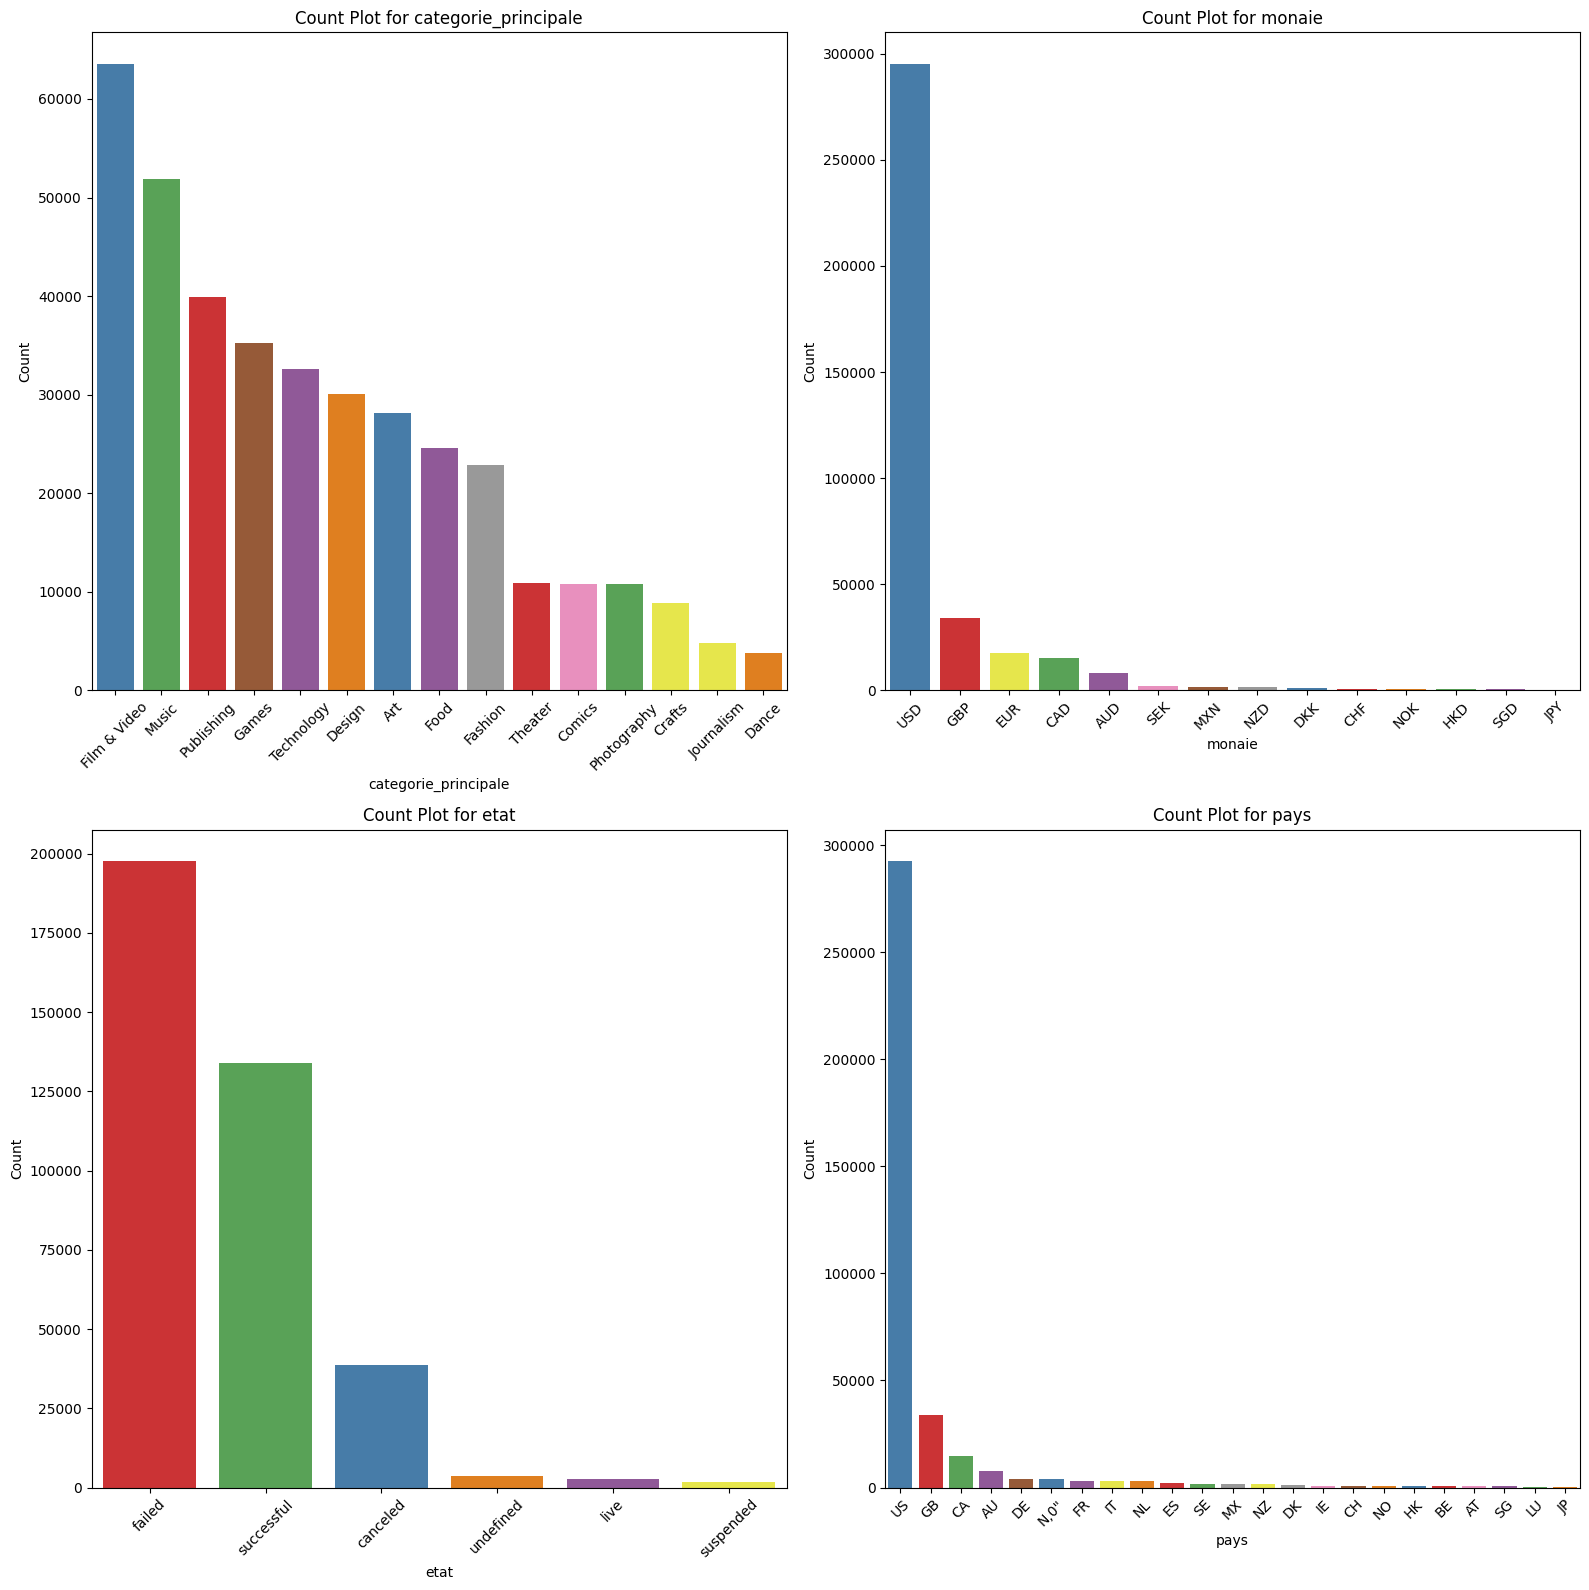

In [30]:
def explore_dataset(df):
    # Exclure la colonne 'ID'
    columns_to_explore = [col for col in df.columns if col != 'ID']
    num_graphs = sum(df[col].nunique() <= 25 for col in columns_to_explore)
    num_cols = 2 
    num_rows = (num_graphs + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8*num_rows))

    graph_counter = 0
    for i, col in enumerate(columns_to_explore):
        if df[col].nunique() <= 25:
            row_pos = graph_counter // num_cols
            col_pos = graph_counter % num_cols
            sns.countplot(x=col, hue=col, data=df, ax=axes[row_pos, col_pos], order=df[col].value_counts().index, palette='Set1', legend=False)
            axes[row_pos, col_pos].set_title(f'Count Plot for {col}')
            axes[row_pos, col_pos].set_xlabel(col)
            axes[row_pos, col_pos].set_ylabel('Count')
            axes[row_pos, col_pos].tick_params(axis='x', rotation=45)
            graph_counter += 1

    plt.tight_layout()
    plt.show()

explore_dataset(financement)


In [31]:
# Sélectionner les variables catégorielles à dummifier
cat_columns = ['categorie', 'categorie_principale', 'monaie']

# Dummification des variables catégorielles
financement_d = pd.get_dummies(financement, columns=cat_columns, drop_first=True) # Suppression de la variable initiale

# Remplacer les valeurs NaN par 0 dans la colonne promesse_usd1
financement_d['promesse_usd1'].fillna(0, inplace=True)

# Afficher les premières lignes du nouveau DataFrame
display(financement_d.head())

/tmp/ipykernel_1457/1579560236.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financement_d['promesse_usd1'].fillna(0, inplace=True)


,ID,nom,date_butoire,objectif,lancement,promesse,etat,supporters,pays,promesse_usd1,...,monaie_EUR,monaie_GBP,monaie_HKD,monaie_JPY,monaie_MXN,monaie_NOK,monaie_NZD,monaie_SEK,monaie_SGD,monaie_USD
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,...,False,True,False,False,False,False,False,False,False,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,...,False,False,False,False,False,False,False,False,False,True
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,...,False,False,False,False,False,False,False,False,False,True
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,...,False,False,False,False,False,False,False,False,False,True
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,...,False,False,False,False,False,False,False,False,False,True


In [32]:
# Pour la date butoire
def get_day(date_str):
    return date_str.split('-')[2]

def get_month(date_str):
    return date_str.split('-')[1]

def get_year(date_str):
    return date_str.split('-')[0]

# Pour la date de lancement
def get_day2(date_str):
    return date_str.split(' ')[0].split('-')[2]

def get_hour(time_str):
    return time_str.split(' ')[1].split(':')[0]

def get_minute(time_str):
    return time_str.split(' ')[1].split(':')[1]

def get_second(time_str):
    return time_str.split(' ')[1].split(':')[2]

# Feature nb de jours d'ecart
def calculer_ecart(date_butoire_str, lancement_str):
    # Convertir les chaînes de caractères en objets datetime
    date_butoire = datetime.strptime(date_butoire_str, '%Y-%m-%d')
    lancement = datetime.strptime(lancement_str.split()[0], '%Y-%m-%d')
    
    # Calculer l'écart entre les deux dates
    ecart = (date_butoire - lancement).days
    
    return ecart

# Date butoire
days_butoire = financement_d['date_butoire'].apply(get_day)
months_butoire = financement_d['date_butoire'].apply(get_month)
years_butoire = financement_d['date_butoire'].apply(get_year)

financement_d['day_butoire'] = days_butoire
financement_d['month_butoire'] = months_butoire
financement_d['year_butoire'] = years_butoire

# Date de lancement
days_lancement = financement_d['lancement'].apply(get_day2)
months_lancement = financement_d['lancement'].apply(get_month)
years_lancement = financement_d['lancement'].apply(get_year)
hours_lancement = financement_d['lancement'].apply(get_hour)
minutes_lancement = financement_d['lancement'].apply(get_minute)
seconds_lancement = financement_d['lancement'].apply(get_second)

financement_d['day_lancement'] = days_lancement
financement_d['month_lancement'] = months_lancement
financement_d['year_lancement'] = years_lancement
financement_d['hour_lancement'] = hours_lancement
financement_d['minute_lancement'] = minutes_lancement
financement_d['second_lancement'] = seconds_lancement

# Ecart
financement_d['ecart_jours'] = financement_d.apply(lambda row: calculer_ecart(row['date_butoire'], row['lancement']), axis=1)

# Afficher les 5 premières lignes du DataFrame après les modifications
display(financement_d.head())

,ID,nom,date_butoire,objectif,lancement,promesse,etat,supporters,pays,promesse_usd1,...,day_butoire,month_butoire,year_butoire,day_lancement,month_lancement,year_lancement,hour_lancement,minute_lancement,second_lancement,ecart_jours
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,...,09,10,2015,11,08,2015,12,12,28,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,...,01,11,2017,02,09,2017,04,43,57,60
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,...,26,02,2013,12,01,2013,00,20,50,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,...,16,04,2012,17,03,2012,03,24,11,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,...,29,08,2015,04,07,2015,08,35,03,56


In [33]:
# Régression logistique sur le financement (etat = financé)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Supprimer les colonnes non pertinentes
data_reg = financement_d.drop(['ID', 'nom', 'date_butoire', 'lancement', 'pays'], axis=1)

# Séparation des variables indépendantes (X) et de la variable cible (y)
X = data_reg.drop('etat', axis=1)
y = (data_reg['etat'] == "successful").astype(int)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred))

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9822666473003843
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     48981
           1       0.97      0.98      0.97     26752

    accuracy                           0.98     75733
   macro avg       0.98      0.98      0.98     75733
weighted avg       0.98      0.98      0.98     75733



In [34]:
# Régression logistique sur le montant financé (etat = financé)

